In [31]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
data=pd.read_csv('Car_sales (2).csv', parse_dates=['Latest_Launch'])
data.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2012-02-27,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,2011-06-28,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2012-01-29,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,2011-04-04,83.998724


In [3]:
data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         157 non-null    object        
 1   Model                157 non-null    object        
 2   Sales_in_thousands   157 non-null    float64       
 3   __year_resale_value  121 non-null    float64       
 4   Vehicle_type         157 non-null    object        
 5   Price_in_thousands   155 non-null    float64       
 6   Engine_size          156 non-null    float64       
 7   Horsepower           156 non-null    float64       
 8   Wheelbase            156 non-null    float64       
 9   Width                156 non-null    float64       
 10  Length               156 non-null    float64       
 11  Curb_weight          155 non-null    float64       
 12  Fuel_capacity        156 non-null    float64       
 13  Fuel_efficiency      154 non-null  

In [5]:
data.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      0.000000
__year_resale_value    22.929936
Vehicle_type            0.000000
Price_in_thousands      1.273885
Engine_size             0.636943
Horsepower              0.636943
Wheelbase               0.636943
Width                   0.636943
Length                  0.636943
Curb_weight             1.273885
Fuel_capacity           0.636943
Fuel_efficiency         1.910828
Latest_Launch           0.000000
Power_perf_factor       1.273885
dtype: float64

In [6]:
data.drop(columns='__year_resale_value', inplace=True)

In [7]:
data.Power_perf_factor.fillna(data.Power_perf_factor.mean(), inplace=True)
data.Price_in_thousands.fillna(data.Price_in_thousands.mean(), inplace=True)
data.Engine_size.fillna(data.Engine_size.mean(), inplace=True)
data.Horsepower.fillna(data.Horsepower.mean(), inplace=True)
data.Wheelbase.fillna(data.Wheelbase.mean(), inplace=True)
data.Width.fillna(data.Width.mean(), inplace=True)
data.Length.fillna(data.Length.mean(), inplace=True)
data.Curb_weight.fillna(data.Curb_weight.mean(), inplace=True)
data.Fuel_capacity.fillna(data.Fuel_capacity.mean(), inplace=True)
data.Fuel_efficiency.fillna(data.Fuel_efficiency.mean(), inplace=True)

In [8]:
data.isnull().mean()*100

Manufacturer          0.0
Model                 0.0
Sales_in_thousands    0.0
Vehicle_type          0.0
Price_in_thousands    0.0
Engine_size           0.0
Horsepower            0.0
Wheelbase             0.0
Width                 0.0
Length                0.0
Curb_weight           0.0
Fuel_capacity         0.0
Fuel_efficiency       0.0
Latest_Launch         0.0
Power_perf_factor     0.0
dtype: float64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,27.390755,3.060897,185.948718,107.487179,71.15000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,14.259359,1.041299,56.518297,7.616772,3.44079,13.388635,0.626447,3.875440,4.241326,24.980973
min,0.110000,9.235000,1.000000,55.000000,92.600000,62.60000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,18.145000,2.300000,150.000000,103.000000,68.40000,177.600000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,23.400000,3.000000,180.000000,107.000000,70.60000,187.800000,3.368000,17.200000,24.000000,72.290355
75%,67.956000,31.930000,3.500000,215.000000,112.200000,73.40000,196.100000,3.778000,19.500000,26.000000,89.401935
max,540.561000,85.500000,8.000000,450.000000,138.700000,79.90000,224.500000,5.572000,32.000000,45.000000,188.144323


### Univariate analysis

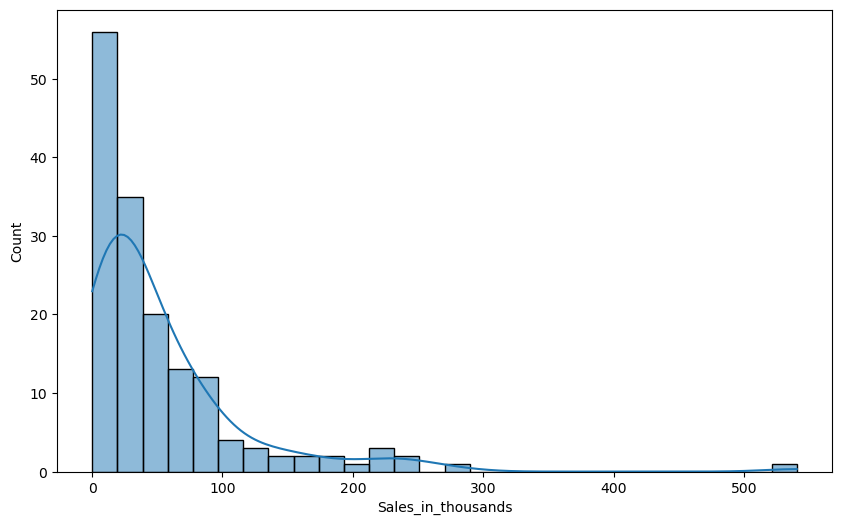

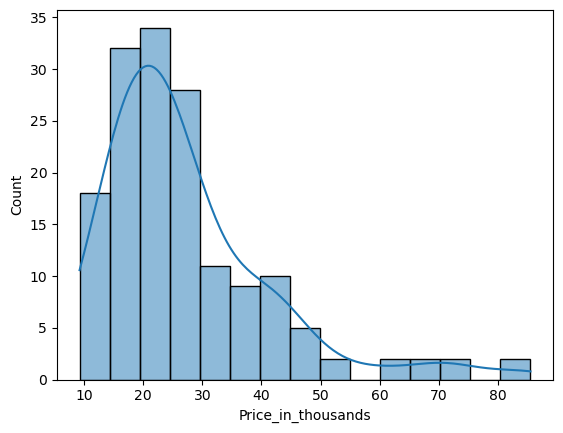

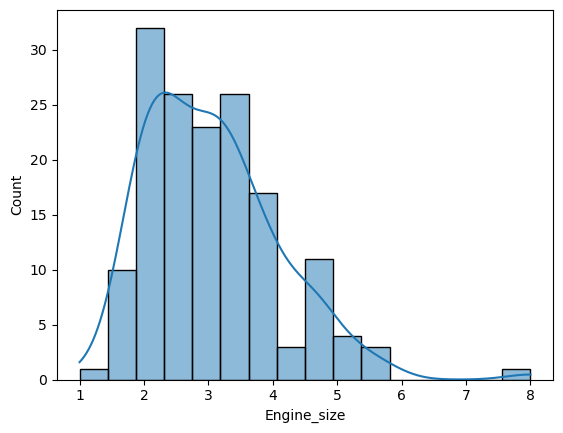

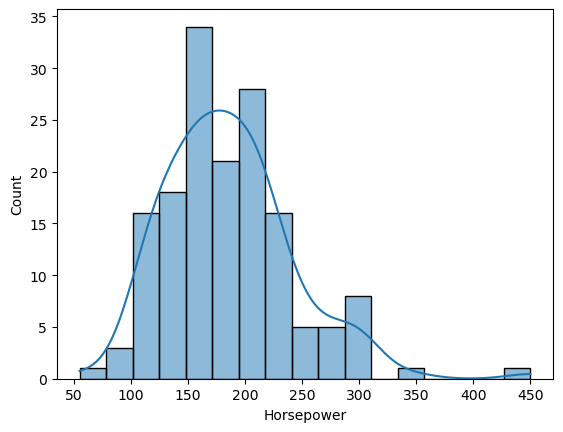

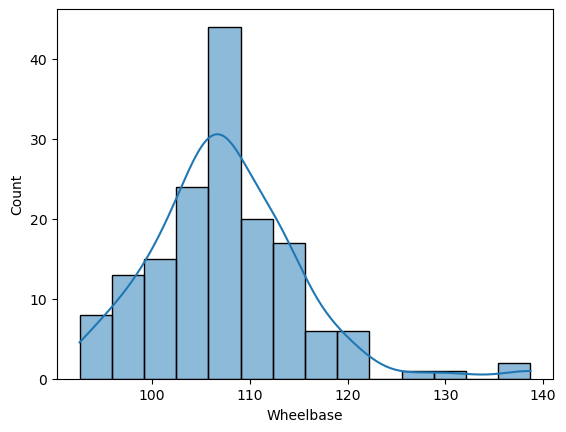

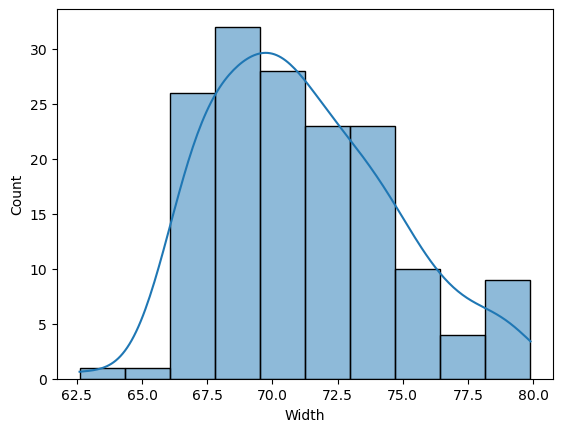

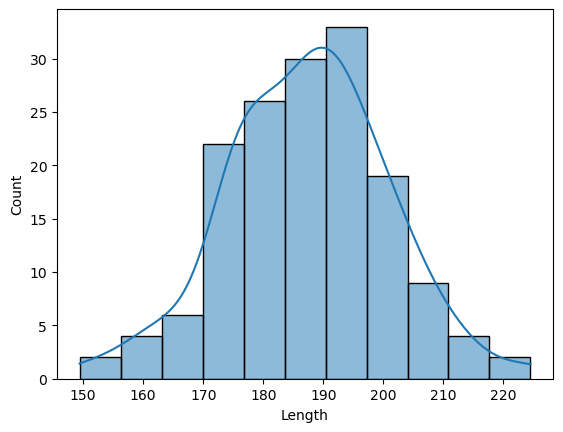

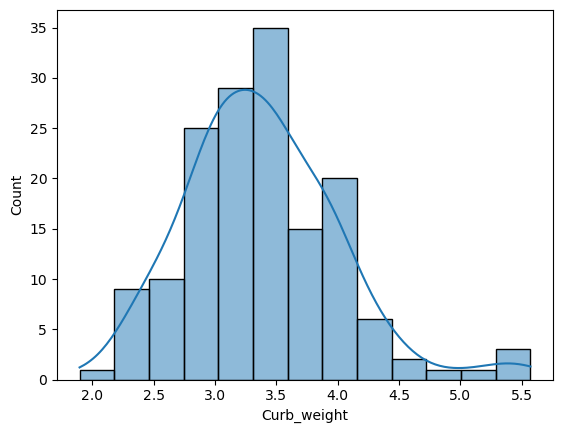

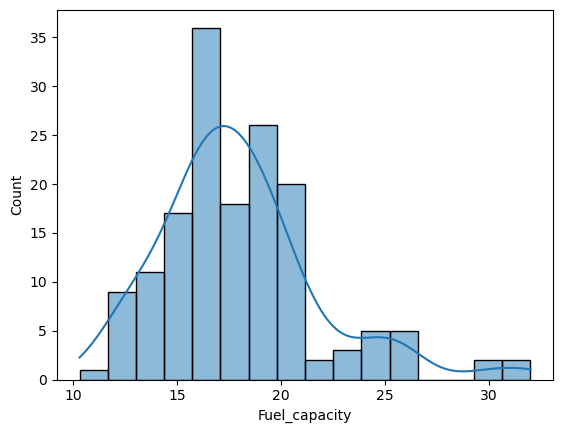

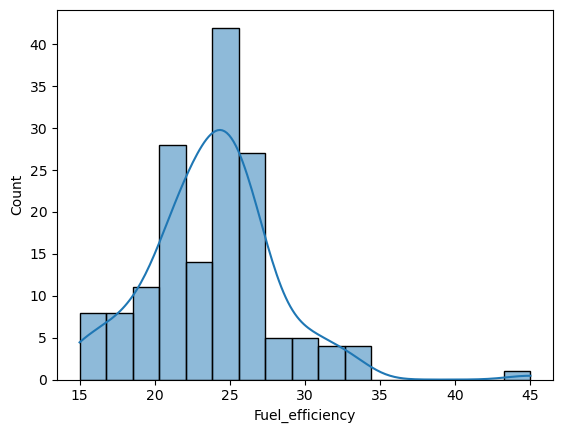

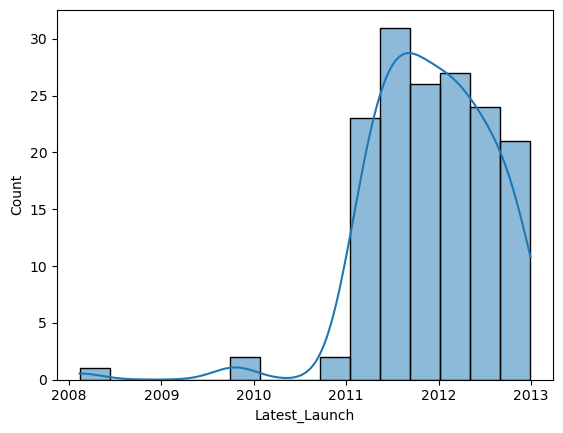

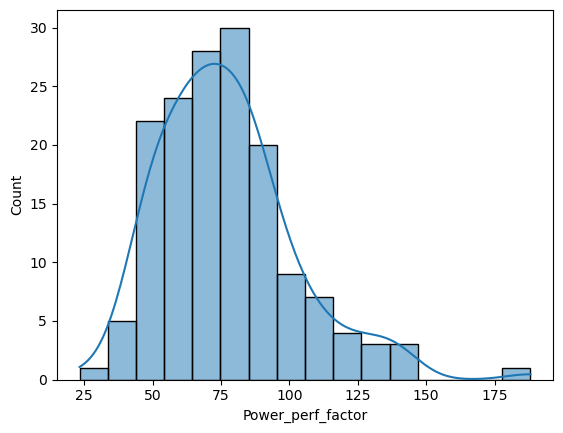

In [11]:
plt.figure(figsize=(10,6))
for i in data.columns:
    if data[i].dtype !='object':
        sns.histplot(data=data[i],kde=True)
        plt.show()

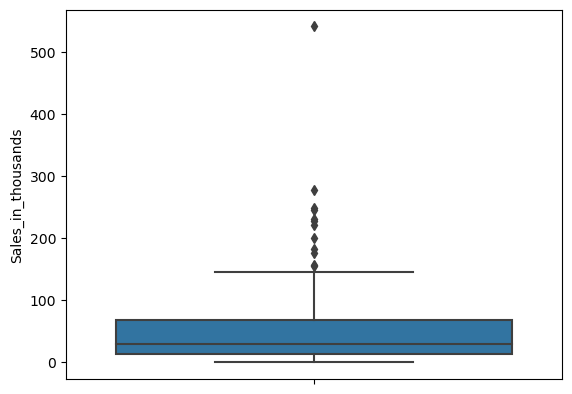

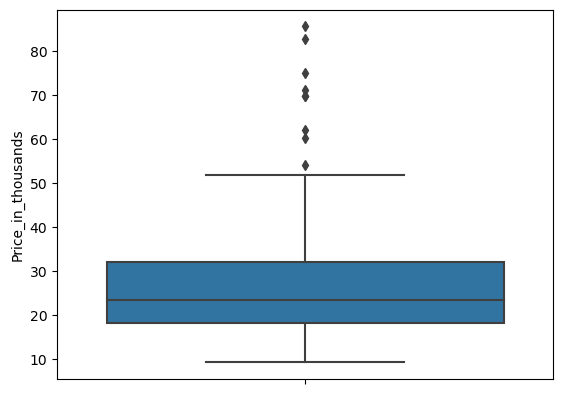

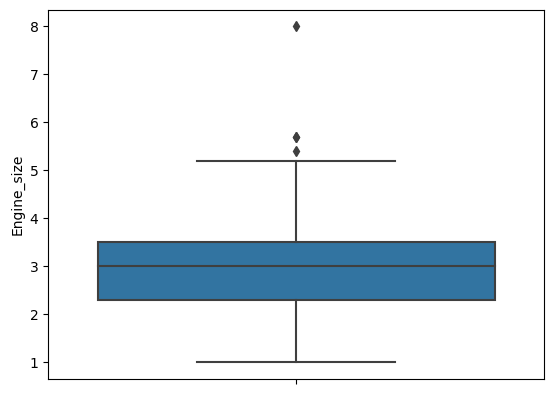

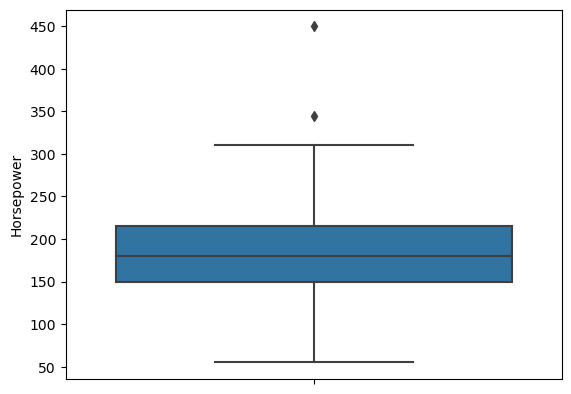

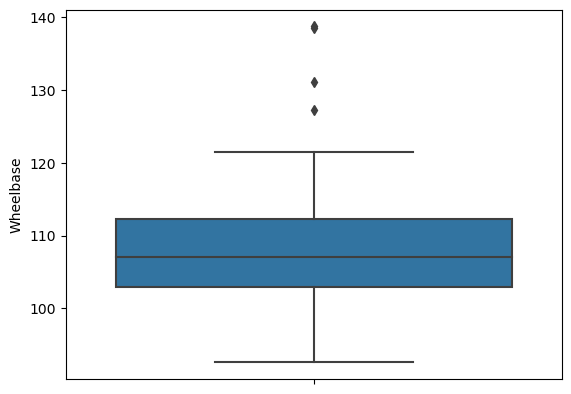

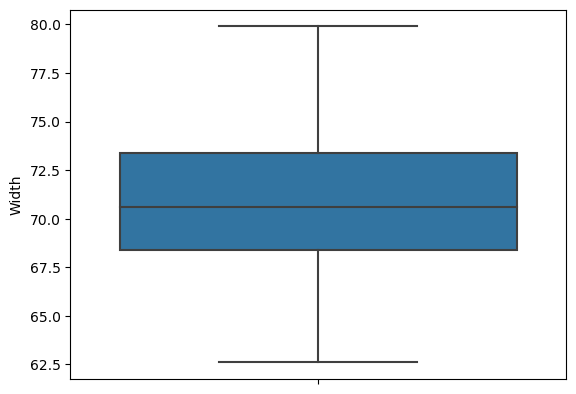

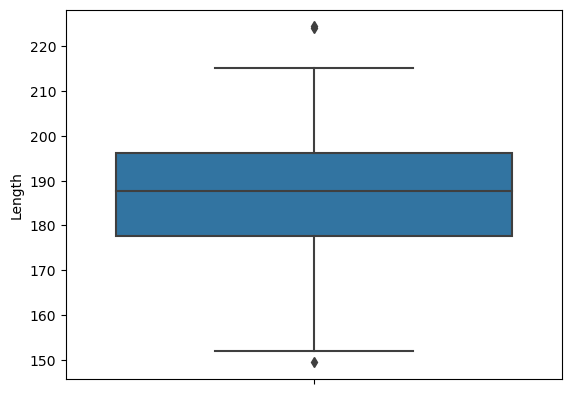

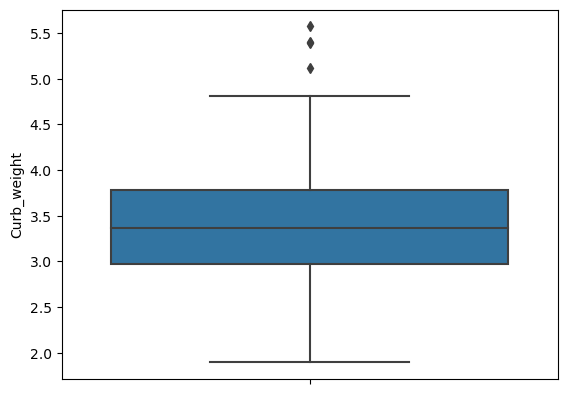

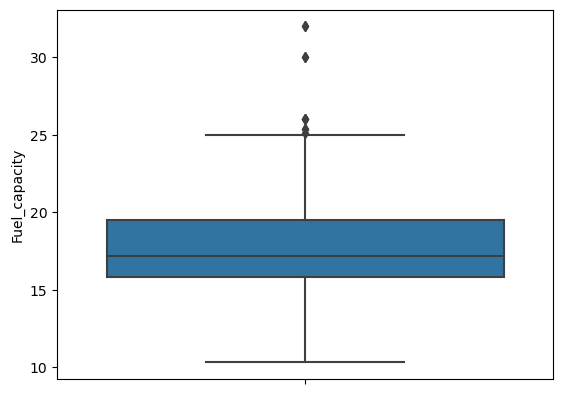

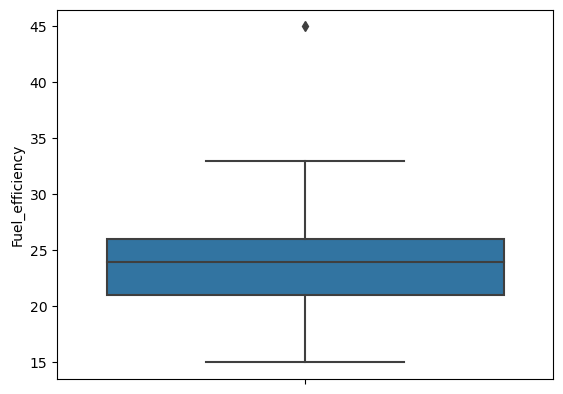

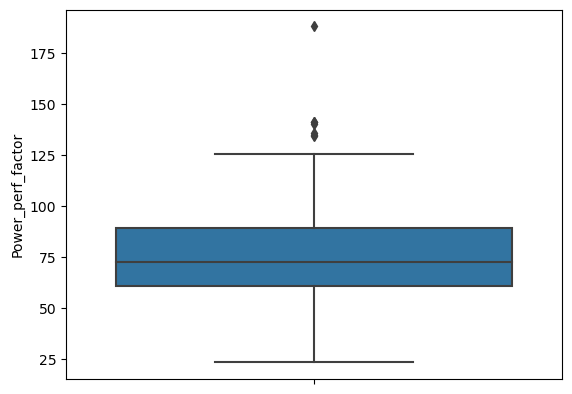

In [12]:
for i in data.columns:
    if data[i].dtypes == float:
        sns.boxplot(y=data[i])
        plt.show()

In [18]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col,[75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [19]:
UL, LL = outlier_limit(data['Price_in_thousands'])
data['Price_in_thousands'] = np.where((data['Price_in_thousands']>UL) | (data['Price_in_thousands']<LL),np.nan,data['Price_in_thousands'])

In [20]:
data.isnull().mean()*100

Manufacturer          0.000000
Model                 0.000000
Sales_in_thousands    0.000000
Vehicle_type          0.000000
Price_in_thousands    1.351351
Engine_size           0.000000
Horsepower            0.000000
Wheelbase             0.000000
Width                 0.000000
Length                0.000000
Curb_weight           0.000000
Fuel_capacity         0.000000
Fuel_efficiency       0.000000
Latest_Launch         0.000000
Power_perf_factor     0.000000
dtype: float64

In [21]:
data.dropna(inplace=True)

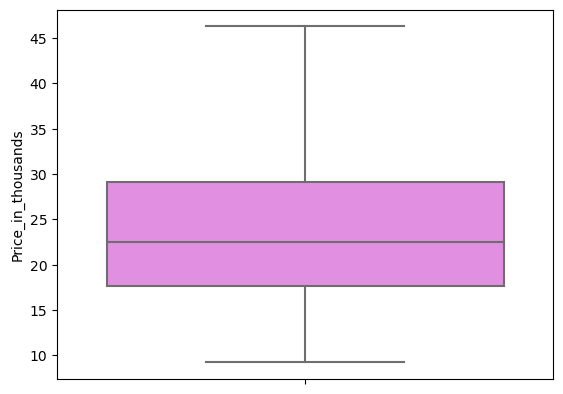

In [22]:
sns.boxplot(data=data, y='Price_in_thousands',color='violet');

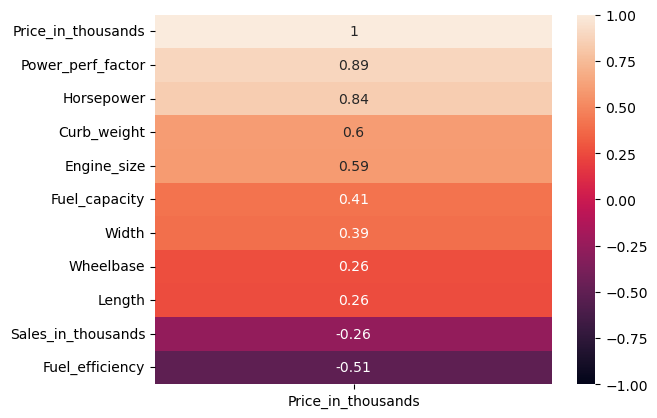

In [24]:
sns.heatmap(data.corr()[['Price_in_thousands']].sort_values(by=['Price_in_thousands'], 
                                                            ascending=False),vmin=-1,vmax=1, annot=True)
plt.show()

In [25]:
data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [27]:
x=data[['Power_perf_factor','Horsepower']].values
y=data[['Price_in_thousands']].values

<b> Model Building

In [30]:
models={
    "LinearRegression":LinearSVR(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
}

In [33]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
    print(f'Cross validation Model is {name}')
    rmse = np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print(f'Average RMSE: {rmse_avg}')
    print("-"*100)

Cross validation Model is LinearRegression
Average RMSE: 2.4355316152185535
----------------------------------------------------------------------------------------------------
Cross validation Model is Ridge
Average RMSE: 2.4062844376155885
----------------------------------------------------------------------------------------------------
Cross validation Model is LinearSVR
Average RMSE: 2.2318479857147477
----------------------------------------------------------------------------------------------------
Cross validation Model is DecisionTreeRegressor
Average RMSE: 4.103787836186062
----------------------------------------------------------------------------------------------------
Cross validation Model is GradientBoostingRegressor
Average RMSE: 3.2561598842540698
----------------------------------------------------------------------------------------------------
Cross validation Model is AdaBoostRegressor
Average RMSE: 3.9002843412428545
-------------------------------------------

#### Best Model is found to be LinearSVR

In [34]:
model = LinearSVR()

#### Train test split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [36]:
model.fit(x_train, y_train)

LinearSVR()

In [37]:
y_pred = model.predict(x_test)

In [38]:
r2_score(y_test, y_pred)

0.9773084276871207

In [39]:
model.score(x_train, y_train)

0.9012575106075426

In [40]:
model.score(x_test, y_test)

0.9773084276871207

In [41]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL', 'PREDICTION'], dtype=float)

In [42]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,21.560,22.347129
1,29.299,27.520999
2,19.840,19.742265
3,16.535,17.695821
4,26.310,27.612756


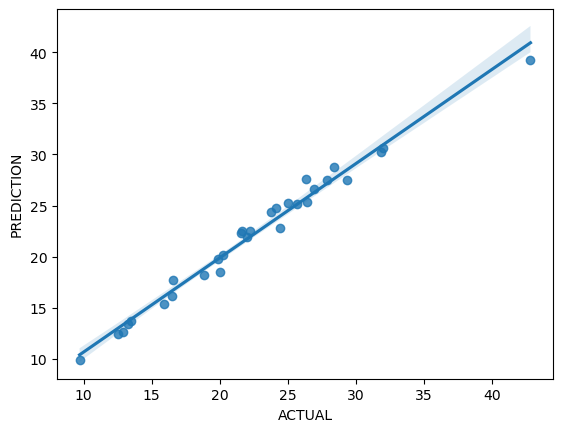

In [43]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION')
plt.show()